## ライブラリのインポート

In [1]:
import numpy as np
#サイキットラーン　（メモリの節約のため、sklearnの中からsvmのみをインポートする
from sklearn import svm
# 手書き文字の画像データ
from sklearn.datasets import load_digits
# 予測結果の精度表示
from sklearn import metrics
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
import japanize_matplotlib

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
import torch
# 自動微分の関数 
from torch.autograd import Variable
# ニューラルネットワークの関数
import torch.nn as nn
# 活性化関数
import torch.nn.functional as F
# 最適化のアルゴリズムの関数
import torch.optim as optim
#ユーティリティのデータから
from torch.utils.data import DataLoader ,TensorDataset

## テスト用データの読み込み

In [3]:
digits = load_digits()
x = digits.data
y = digits.target

In [4]:
# 手書き文字の画像データを表形式で表示
df_x=pd.DataFrame(digits.data ,columns=digits.feature_names)
df_x.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### 補足情報
画像データの説明

In [5]:
## 画像データは、8×8の画素数で１画素あたりの数字は色の明るさを表す
## 0～15の数字で、0が白、15が黒となっている
print("--- 画像データ（１枚目） ---")
print(digits.images[0])
print('データの格納件数',digits.images.shape)
print('')
## dataには画像データを１次元に並べた値が格納されている。
print("--- 1次元画像データ（１枚目） ---")
print(digits.data[0])
print('データの格納件数',digits.data.shape)

--- 画像データ（１枚目） ---
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
データの格納件数 (1797, 8, 8)

--- 1次元画像データ（１枚目） ---
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
データの格納件数 (1797, 64)


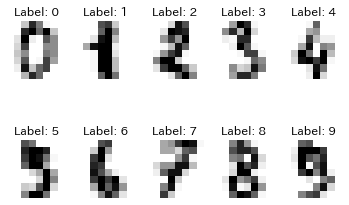

In [7]:
# 画像と正解値の表示
images = digits.images
labels = digits.target
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.imshow(images[i], cmap="Greys")    # 表示の対象データ
    plt.axis("off")                        # 軸は表示しない
    plt.title("Label: " +  str(labels[i]))
plt.show()

In [8]:
# 手書き文字の画像データを分類結果で表示 (targetに分析結果が格納されている)
df_y=pd.DataFrame(digits.target ,columns=['target'])
df_y.head(20)

,target
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


## 訓練データと検証データに分割する

In [9]:
# 訓練データと検証データの分割
# random_stateは再現性を確保するために指定する
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=1) 

# Tensorに変換
X_train = torch.tensor(x_train, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.int64) 
X_test = torch.tensor(x_test, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.int64) 

# ニューラルネットワークの定義

ニューラルネットワークのノード数や階層を定義する \
出力値を求める関数を定義する（ノード数によって変わる、求めたい値によっても変わる）

In [76]:
# Module を継承して、Netクラスを作成する
#  ノード数や階層を増やす　⇒　精度が向上する、学習のパフォーマンスは落ちる
#  ノード数や階層を減らす　⇒　精度が下がる、学習のパフォーマンスは上がる
#   　ノードや階層を変更しても精度が上がらない　⇒　入力データが不足している
net = nn.Sequential(
        #   中間層のノード数は、精度向上やパフォーマンス向上を狙って調整する
        nn.Linear(64 , 32),         # nn.Linear (入力のノード数 , 中間層ノード数)
        nn.ReLU(), 
        nn.Linear(32 , 16),             # nn.Linear (中間層ノード数 , 中間層ノード数)
        nn.ReLU(),
        nn.Linear(16,  10)        # nn.Linear (中間層ノード数 , 出力のノード数)
        )

## 学習する

In [77]:
# 損失の定義 (交差エントロピー誤差関数)
criterion = nn.CrossEntropyLoss()

In [78]:
# 最適化のアルゴリズムの選択　（SDG）
## model.parameters  調整する値
## lr(learning rate) ：学習率　どれぐらいの幅でパラメータを更新していくのか
#optimizer = optim.SGD(net.parameters() , lr=0.01)
optimizer = optim.Adam(net.parameters() , lr=0.01)

In [79]:
loss_list = []
loss_temp = 0
# 損失を初期化　
total_loss = 0

# トレーニングの回数分ループする。
for epoch in range(1000):
       
    # 出力を計算する 
    output = net(X_train)

    # 損失の計算 (出力の結果；output と 正解：y_trainを渡す)
    loss = criterion(output ,Y_train)

    # パラメータの勾配を初期化する
    optimizer.zero_grad()
    # ロスを伝播する
    loss.backward()

    # パラメータを更新する
    optimizer.step()

    # トータルロスを格納
    total_loss += loss.item()
    loss_list.append(loss.item())
    loss_temp += loss

    # 10回毎に回数とトータルロスを表示する
    if (epoch+1)%100 == 0:
        print('Epoch' , epoch+1 ,  ',Loss' , loss.item())
        loss_temp = 0

Epoch 100 ,Loss 0.002004167065024376
Epoch 200 ,Loss 0.0005543346633203328
Epoch 300 ,Loss 0.00026616326067596674
Epoch 400 ,Loss 0.0001549169683130458
Epoch 500 ,Loss 0.00010238768300041556
Epoch 600 ,Loss 7.296158582903445e-05
Epoch 700 ,Loss 5.45859984413255e-05
Epoch 800 ,Loss 4.232744686305523e-05
Epoch 900 ,Loss 3.376140011823736e-05
Epoch 1000 ,Loss 2.753933767962735e-05


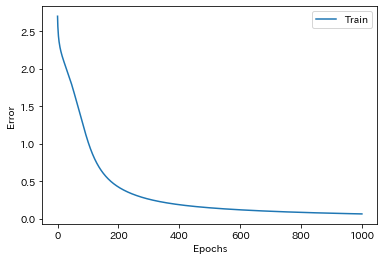

In [14]:
plt.plot(range(len(loss_list)), loss_list, label="Train")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [71]:
y_hat = net(X_train)
print(metrics.classification_report(Y_train, np.array(y_hat.argmax(1))))  # 正解率など
print('-----')
print(metrics.confusion_matrix(Y_train, np.array(y_hat.argmax(1))))  # 行:正解、列:予測

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       0.96      0.97      0.97       114
           2       0.99      1.00      1.00       109
           3       1.00      0.98      0.99       100
           4       0.99      0.99      0.99       102
           5       1.00      0.99      1.00       117
           6       1.00      1.00      1.00       111
           7       1.00      1.00      1.00       105
           8       0.98      0.96      0.97       112
           9       0.97      1.00      0.99       104

    accuracy                           0.99      1078
   macro avg       0.99      0.99      0.99      1078
weighted avg       0.99      0.99      0.99      1078

-----
[[104   0   0   0   0   0   0   0   0   0]
 [  0 111   0   0   1   0   0   0   1   1]
 [  0   0 109   0   0   0   0   0   0   0]
 [  0   0   1  98   0   0   0   0   1   0]
 [  0   0   0   0 101   0   0   0   0   1]
 [  0   0   0   0   

# 予測する

## 誤差の確認

In [74]:
# 学習を行わないモードに変更
net.eval()


# テストデータｘに対する結果　（値の大きい方を取得する）
y_hat = net(X_test)
count = (y_hat.argmax(1) == Y_test).sum().item()

# テストｘの結果とｙの比較　（結果が一致したら加算して、不一致は加算しない。その結果をデータ数で割る）
accuracy = str(count/len(Y_test)*100) + '%'
print(accuracy)

95.13212795549374%


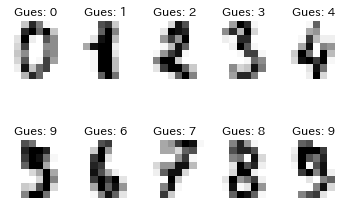

In [61]:
# 予測結果と画像の対応
images = digits.images

for i in range(10):
    data = torch.tensor(digits.data[i], dtype=torch.float32)
    y_predict = net(data)
    plt.subplot(2, 5, i + 1)  # 2行5列、i+1の位置
    plt.imshow(images[i], cmap="Greys")
    plt.axis("off")
    plt.title("Gues: " +  str(y_predict.argmax(0).item()))    ## 判断結果を表示する（判断結果の下に実際の画像を表示する）
              
plt.show()

## 予測値と正解の比較

In [69]:
y_hat = net(X_test)
print(metrics.classification_report(y_test, np.array(y_hat.argmax(1))))  # 正解率など
print('-----')
print(metrics.confusion_matrix(y_test, np.array(y_hat.argmax(1))))  # 行:正解、列:予測

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.94      0.96      0.95        68
           2       0.92      1.00      0.96        68
           3       0.96      0.95      0.96        83
           4       0.97      0.99      0.98        79
           5       0.92      0.89      0.91        65
           6       0.93      0.97      0.95        70
           7       0.97      0.91      0.94        74
           8       0.92      0.97      0.94        62
           9       0.96      0.91      0.93        76

    accuracy                           0.95       719
   macro avg       0.95      0.95      0.95       719
weighted avg       0.95      0.95      0.95       719

-----
[[72  0  0  0  1  1  0  0  0  0]
 [ 0 65  1  0  0  0  2  0  0  0]
 [ 0  0 68  0  0  0  0  0  0  0]
 [ 0  0  3 79  0  0  0  1  0  0]
 [ 0  0  0  0 78  0  1  0  0  0]
 [ 0  0  2  2  0 58  2  0  1  0]
 [ 0  2  0  0  0  0 68  0  0  0]
 [ 0